In [182]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [183]:
train=pd.read_csv("train.csv")
train.head()

Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0         Urban           Y  
3             1.0         Urban           Y  
4             1.0         Urban           Y

In [184]:
train.shape

(614, 13)

In [185]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


## Missing values treatment

In [186]:
train.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [187]:
train.Gender.value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [188]:
train.Gender.fillna('Male',inplace=True)
#train.isna().sum()

In [189]:
train.Married.value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [190]:
train.Married.fillna('Yes',inplace=True)
#train.isna().sum()

In [191]:
train.Dependents.unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [192]:
train.Dependents.replace('3+','3',inplace=True)

In [193]:
train.Dependents.fillna('0',inplace=True)
#train.isna().sum()

In [194]:
train.Self_Employed.value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [195]:
train.Self_Employed.fillna('No',inplace=True)
train.isna().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

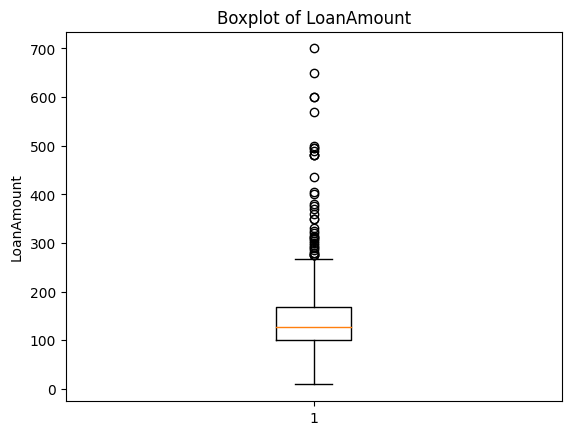

In [196]:
# create a boxplot of the LoanAmount variable
plt.boxplot(train['LoanAmount'].dropna())

# add a title and y-axis label to the plot
plt.title('Boxplot of LoanAmount')
plt.ylabel('LoanAmount')

# display the plot
plt.show()

In [197]:
train.LoanAmount.fillna(train.LoanAmount.median(),inplace=True)
train.isna().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [198]:
train.Loan_Amount_Term.mode()

0    360.0
Name: Loan_Amount_Term, dtype: float64

In [199]:
train.Loan_Amount_Term.fillna(360.0,inplace=True)
train.isna().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [200]:
train.Credit_History.value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [201]:
train.Credit_History.mode()

0    1.0
Name: Credit_History, dtype: float64

In [202]:
train.Credit_History.fillna(1.0,inplace=True)
train.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [203]:
train.head()

Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0       128.0             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0         Urban           Y  
3             1.0         Urban           Y  
4             1.0         Urban           Y

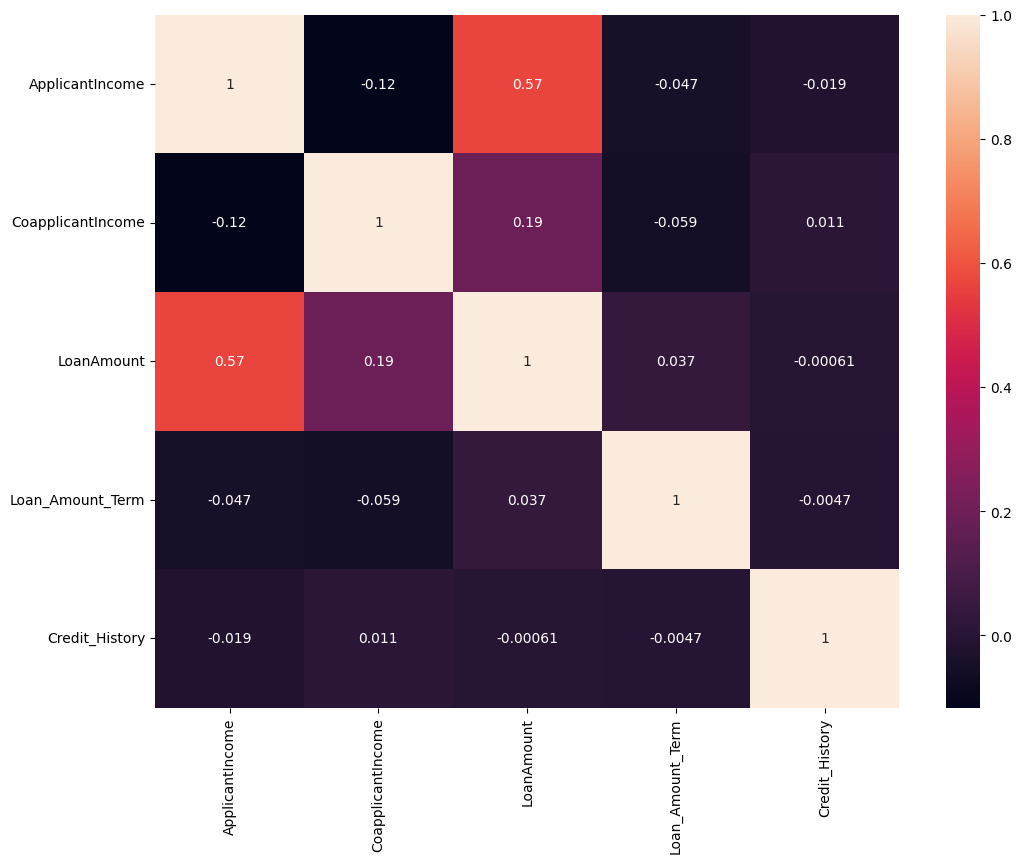

In [204]:
sns.heatmap(train.corr(),annot=True)
plt.gcf().set_size_inches(12,9)
plt.show()

In [205]:
train.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

## ApplicantIncome, Coapplicant Income, LoanAmount, Loan_Amount_Term can be plotted using Distribution graph


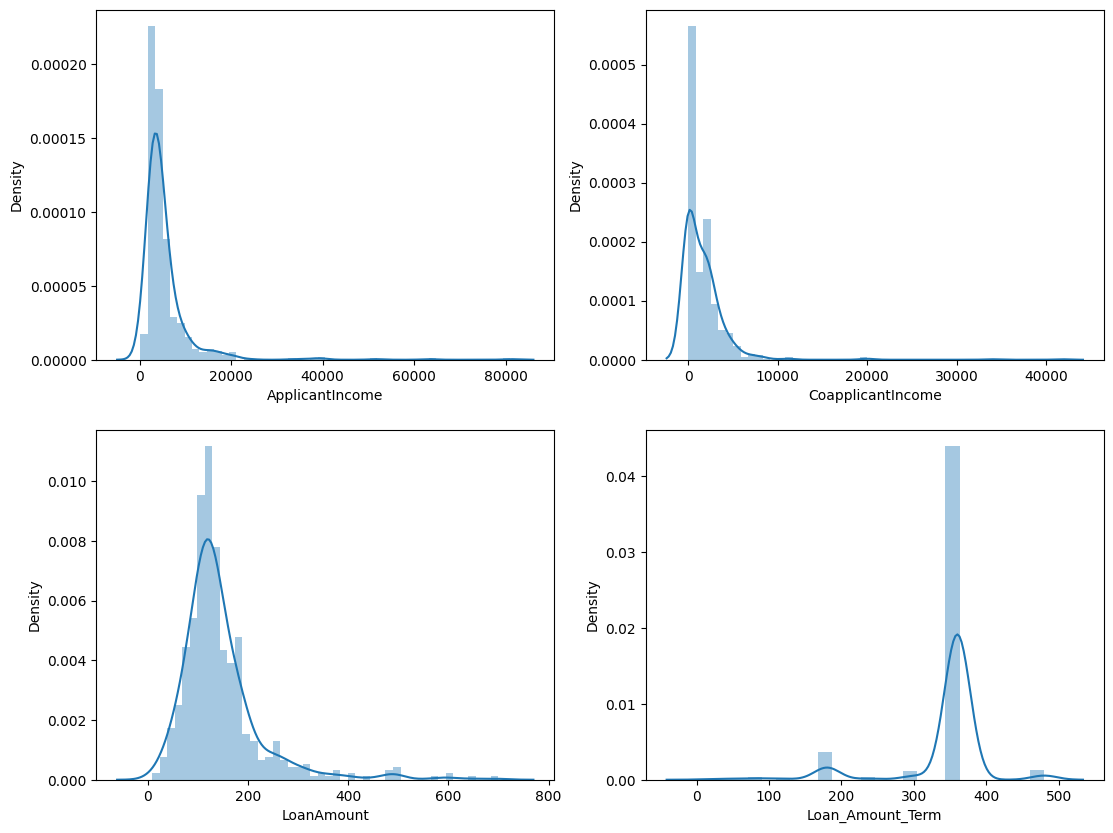

In [206]:
plt.figure(figsize=(13,10))

plt.subplot(2,2,1)
sns.distplot(train["ApplicantIncome"])

plt.subplot(2,2,2)
sns.distplot(train["CoapplicantIncome"])

plt.subplot(2,2,3)
sns.distplot(train["LoanAmount"])

plt.subplot(2,2,4)
sns.distplot(train["Loan_Amount_Term"])

plt.show()

## Applicant Income, Coapplicant Income, Loan Amount are positively skewed, while Loan Amount Term is negatively skewed.

In [179]:
train

Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes          3      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849                0.0       128.0             360.0   
1               4583             1508.0       128.0             360.0   
2               3000                0.0        66.0             360.0   
3               2583             2358.0       120.0             360.0   
4               6000                0.0       141.0             360.0   
..               ...                ...         ...               ...   
609             2900                0.0        71.0             360.0   
610             4106                0.0        40.0             180.0   
611             8072              240.0       253.0             360.0   
612             7583                0.0       187.0             360.0   
613             4583                0.0       133.0             360.0   

     Credit_History Property_Area Loan_Status  
0               1.0         Urban           Y  
1               1.0         Rural           N  
2               1.0         Urban           Y  
3               1.0         Urban           Y  
4               1.0         Urban           Y  
..              ...           ...         ...  
609             1.0         Rural           Y  
610             1.0         Rural           Y  
611             1.0         Urban           Y  
612             1.0         Urban           Y  
613             0.0     Semiurban           N  

[614 rows x 13 columns]

In [209]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


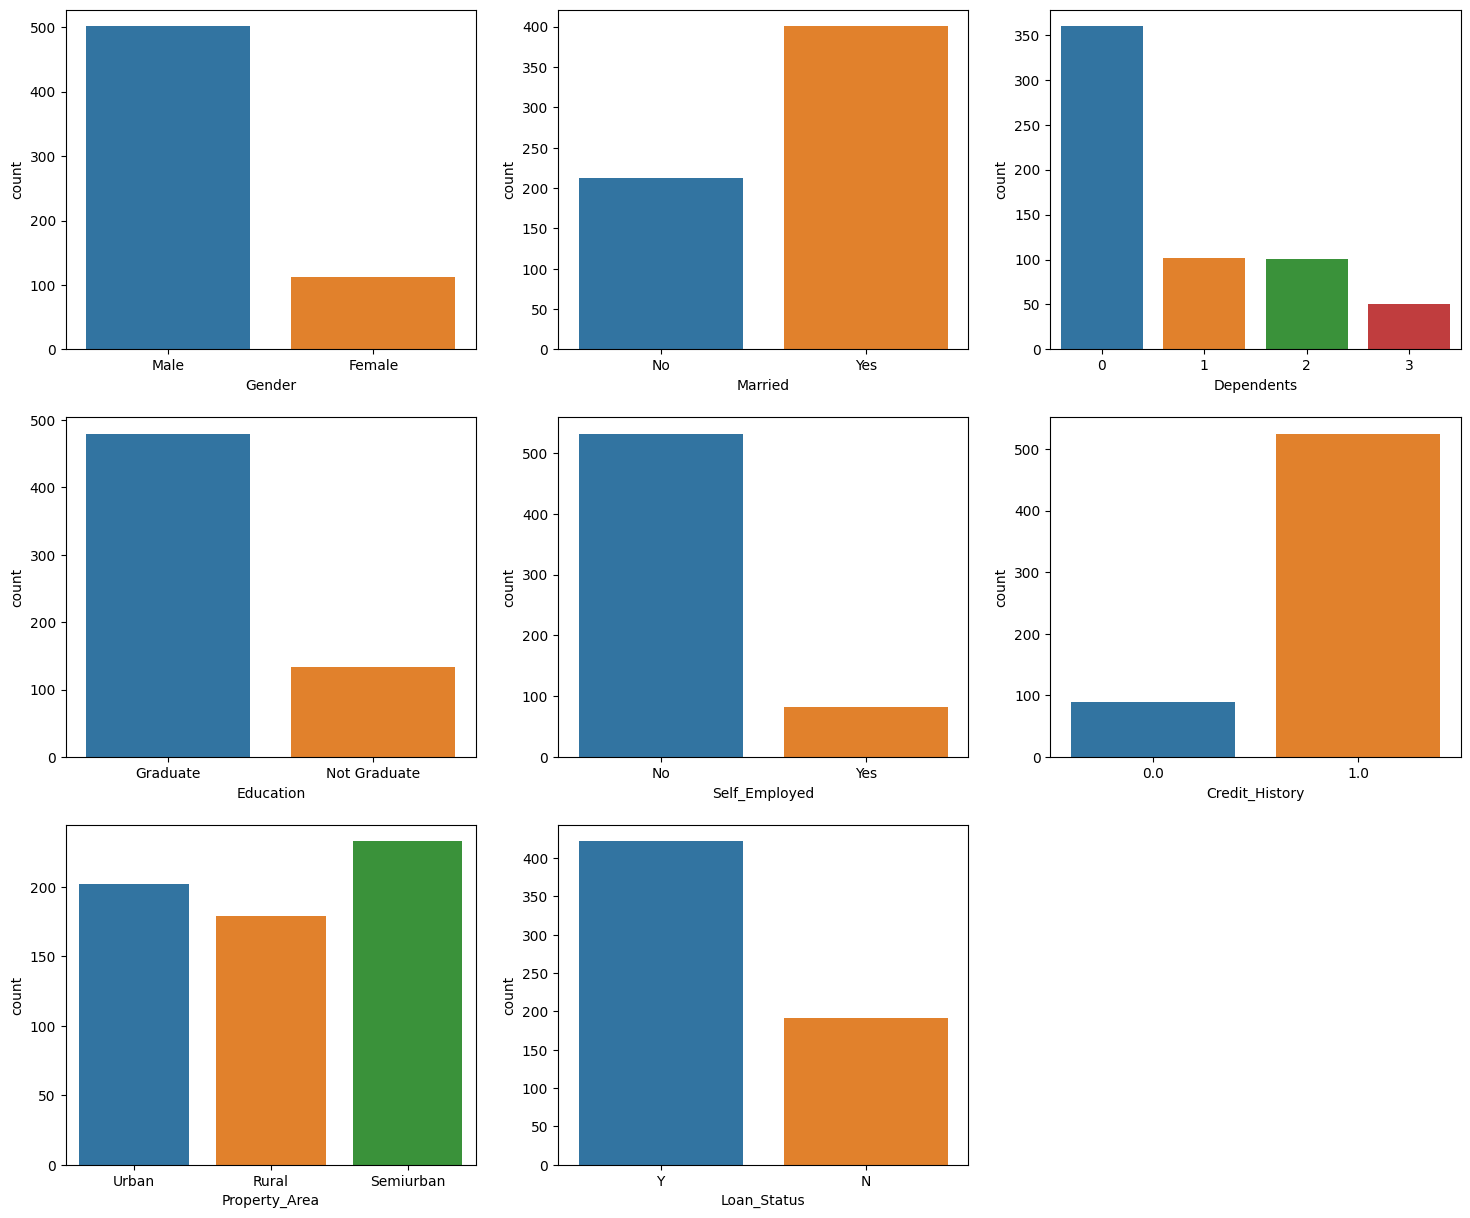

In [213]:
plt.figure(figsize=(18,15))

plt.subplot(3,3,1)
sns.countplot(x='Gender',data=train)

plt.subplot(3,3,2)
sns.countplot(x='Married',data=train)

plt.subplot(3,3,3)
sns.countplot(x='Dependents',data=train)

plt.subplot(3,3,4)
sns.countplot(x='Education',data=train)

plt.subplot(3,3,5)
sns.countplot(x='Self_Employed',data=train)

plt.subplot(3,3,6)
sns.countplot(x='Credit_History',data=train)

plt.subplot(3,3,7)
sns.countplot(x="Property_Area",data=train)

plt.subplot(3,3,8)
sns.countplot(x='Loan_Status',data=train)


plt.show()

* There is a majority of Males in Gender, married people, 0 dependents, Graduates, Not self Employed, SemiUrban people in the dataset.
* There are more people who have their loan approved.

## Comparing Loan Status with the factors responsible for getting Loan

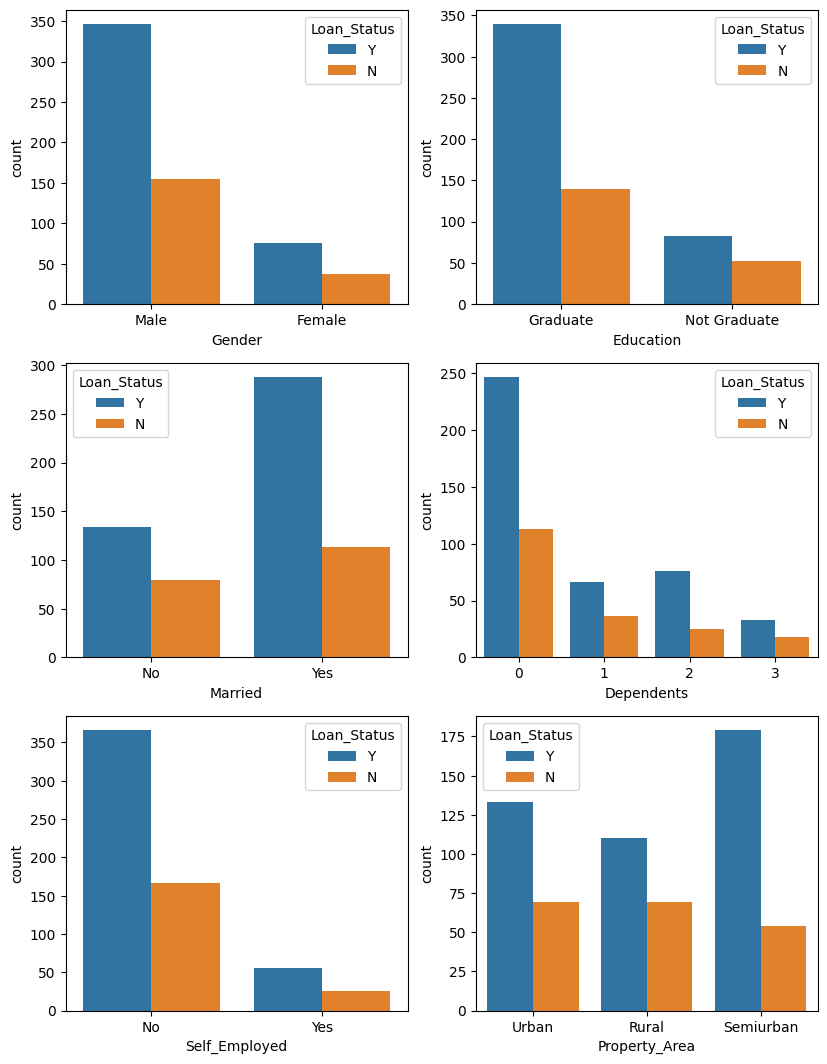

In [214]:
plt.figure(figsize=(15,13))

plt.subplot(3,3,1)
sns.countplot(data=train,x="Gender",hue="Loan_Status")

plt.subplot(3,3,2)
sns.countplot(data=train,x="Education",hue="Loan_Status")

plt.subplot(3,3,4)
sns.countplot(data=train,x="Married",hue="Loan_Status")

plt.subplot(3,3,5)
sns.countplot(data=train,x="Dependents",hue="Loan_Status")

plt.subplot(3,3,7)
sns.countplot(data=train,x="Self_Employed",hue="Loan_Status")

plt.subplot(3,3,8)
sns.countplot(data=train,x="Property_Area",hue="Loan_Status")

plt.show()

- There are more number of Males getting Loan when compared with Female.
* In terms of Education, there are more number of Graduates getting Loan approved .
* When married and un-married's are compared there are more number of married getting loan approved.
* People with 0 dependents have a high chance of getting loan approved.
* High amount of need of loan in the people who are not Self Employed.
* Semiurban's are more in getting loan approvals.

In [215]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [216]:
train.drop("Loan_ID",inplace=True,axis=1)


In [217]:
train["LoanAmount"]=train["LoanAmount"].astype("int64")
train["Loan_Amount_Term"]=train["Loan_Amount_Term"].astype("int64")
train["Credit_History"]=train["Credit_History"].astype("int64")
train["Dependents"]=train["Dependents"].astype("int64")

In [218]:
train["CoapplicantIncome"]=train["CoapplicantIncome"].astype("int64")

In [219]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Gender             614 non-null    object
 1   Married            614 non-null    object
 2   Dependents         614 non-null    int64 
 3   Education          614 non-null    object
 4   Self_Employed      614 non-null    object
 5   ApplicantIncome    614 non-null    int64 
 6   CoapplicantIncome  614 non-null    int64 
 7   LoanAmount         614 non-null    int64 
 8   Loan_Amount_Term   614 non-null    int64 
 9   Credit_History     614 non-null    int64 
 10  Property_Area      614 non-null    object
 11  Loan_Status        614 non-null    object
dtypes: int64(6), object(6)
memory usage: 57.7+ KB


In [220]:
cat=train.select_dtypes(["object"]).columns
cat=cat[0:]
cat

Index(['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area',
       'Loan_Status'],
      dtype='object')

In [221]:
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()
train[cat]=oe.fit_transform(train[cat])
train.head()

Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  \
0     1.0      0.0           0        0.0            0.0             5849   
1     1.0      1.0           1        0.0            0.0             4583   
2     1.0      1.0           0        0.0            1.0             3000   
3     1.0      1.0           0        1.0            0.0             2583   
4     1.0      0.0           0        0.0            0.0             6000   

   CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0                  0         128               360               1   
1               1508         128               360               1   
2                  0          66               360               1   
3               2358         120               360               1   
4                  0         141               360               1   

   Property_Area  Loan_Status  
0            2.0          1.0  
1            0.0          0.0  
2            2.0          1.0  
3            2.0          1.0  
4            2.0          1.0

In [222]:
train["Gender"]=train["Gender"].astype("int64")
train["Married"]=train["Married"].astype("int64")
train["Self_Employed"]=train["Self_Employed"].astype("int64")
train["Property_Area"]=train["Property_Area"].astype("int64")
train["Loan_Status"]=train["Loan_Status"].astype("int64")
train["Education"]=train["Education"].astype("int64")

In [223]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Gender             614 non-null    int64
 1   Married            614 non-null    int64
 2   Dependents         614 non-null    int64
 3   Education          614 non-null    int64
 4   Self_Employed      614 non-null    int64
 5   ApplicantIncome    614 non-null    int64
 6   CoapplicantIncome  614 non-null    int64
 7   LoanAmount         614 non-null    int64
 8   Loan_Amount_Term   614 non-null    int64
 9   Credit_History     614 non-null    int64
 10  Property_Area      614 non-null    int64
 11  Loan_Status        614 non-null    int64
dtypes: int64(12)
memory usage: 57.7 KB


## Outlier Analysis

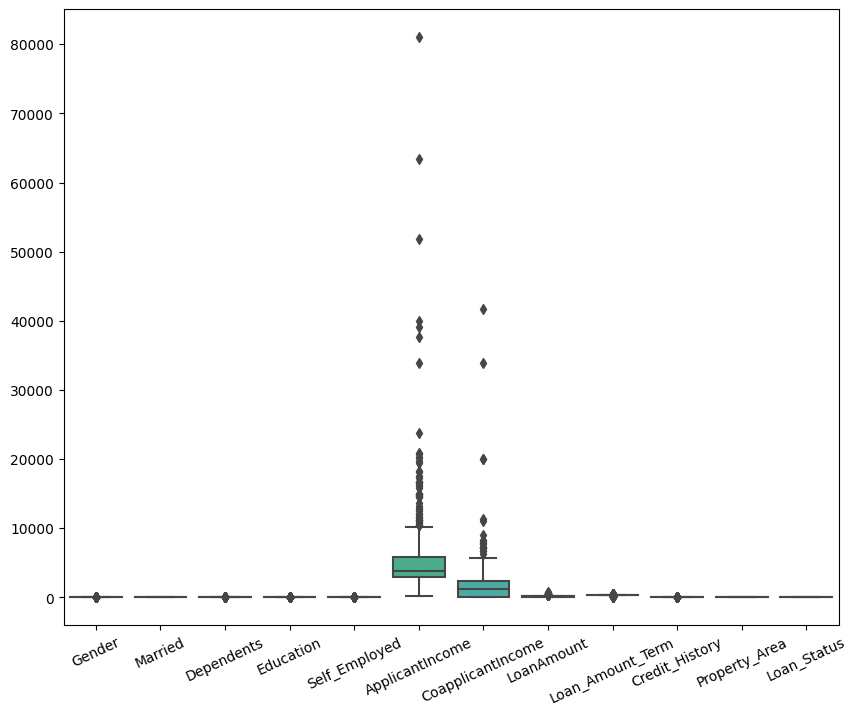

In [224]:
plt.figure(figsize=(10,8))
sns.boxplot(data=train)
plt.xticks(rotation=25)
plt.show()

In [225]:
Q1=train.quantile(0.25)
Q3=train.quantile(0.75)
IQR=Q3-Q1

train=train[~((train<(Q1-1.5*IQR))|(train>(Q3+1.5*IQR))).any(axis=1)]

In [226]:
train.Gender=np.sqrt(train.Gender)
train.Education=np.sqrt(train.Education)
train.Self_Employed=np.sqrt(train.Self_Employed)
train.ApplicantIncome=np.sqrt(train.ApplicantIncome)
train.CoapplicantIncome=np.sqrt(train.CoapplicantIncome)
train.LoanAmount=np.sqrt(train.LoanAmount)
train.Loan_Amount_Term=np.sqrt(train.Loan_Amount_Term)
train.Credit_History=np.sqrt(train.Credit_History)

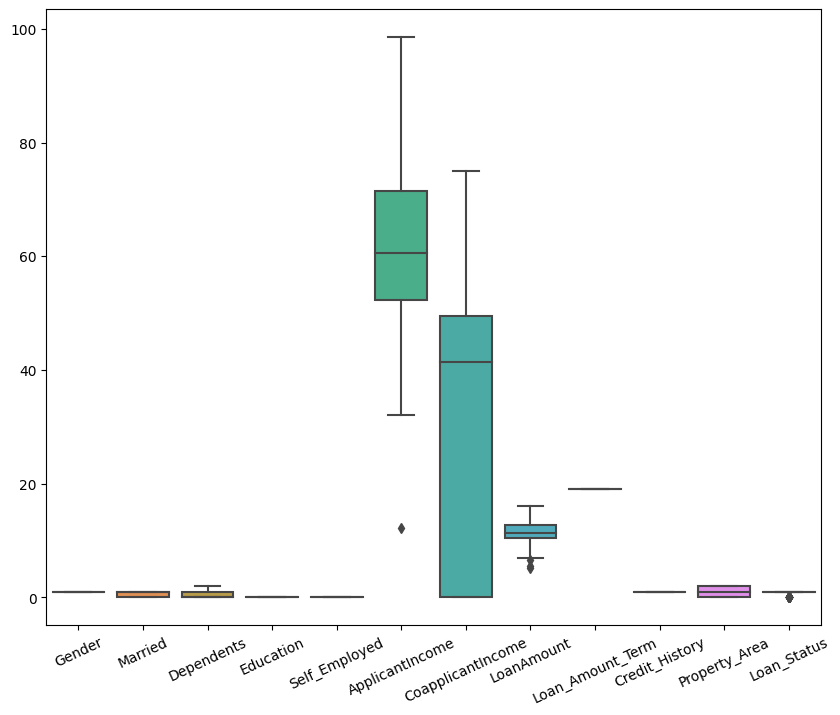

In [227]:
plt.figure(figsize=(10,8))
sns.boxplot(data=train)
plt.xticks(rotation=25)
plt.show()

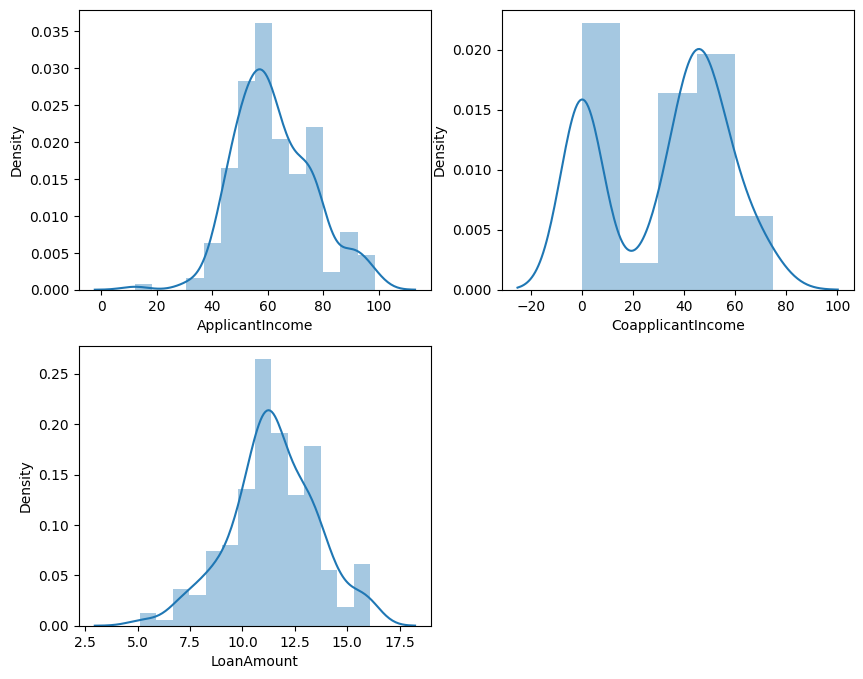

In [228]:
plt.figure(figsize=(10,8))

plt.subplot(2,2,1)
sns.distplot(train["ApplicantIncome"])

plt.subplot(2,2,2)
sns.distplot(train["CoapplicantIncome"])

plt.subplot(2,2,3)
sns.distplot(train["LoanAmount"])


plt.show()

In [229]:
train["LoanAmount"]=train["LoanAmount"].astype("int64")
train["Loan_Amount_Term"]=train["Loan_Amount_Term"].astype("int64")
train["Credit_History"]=train["Credit_History"].astype("int64")
train["Gender"]=train["Gender"].astype("int64")
train["Self_Employed"]=train["Self_Employed"].astype("int64")
train["Loan_Status"]=train["Loan_Status"].astype("int64")
train["Education"]=train["Education"].astype("int64")
train["ApplicantIncome"]=train["ApplicantIncome"].astype("int64")
train["CoapplicantIncome"]=train["CoapplicantIncome"].astype("int64")

In [230]:
y=train.Loan_Status
x=train.drop('Loan_Status',axis=1)

In [231]:
y

0      1
1      0
4      1
8      1
10     1
      ..
603    1
606    1
608    1
611    1
612    1
Name: Loan_Status, Length: 207, dtype: int64

In [232]:
x

Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  \
0         1        0           0          0              0               76   
1         1        1           1          0              0               67   
4         1        0           0          0              0               77   
8         1        1           2          0              0               63   
10        1        1           2          0              0               56   
..      ...      ...         ...        ...            ...              ...   
603       1        0           0          0              0               60   
606       1        1           1          0              0               58   
608       1        1           0          0              0               56   
611       1        1           1          0              0               89   
612       1        1           2          0              0               87   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0                    0          11                18               1   
1                   38          11                18               1   
4                    0          11                18               1   
8                   39          12                18               1   
10                  26           8                18               1   
..                 ...         ...               ...             ...   
603                 65          13                18               1   
606                 50          13                18               1   
608                 44          10                18               1   
611                 15          15                18               1   
612                  0          13                18               1   

     Property_Area  
0                2  
1                0  
4                2  
8                2  
10               2  
..             ...  
603              0  
606              1  
608              0  
611              2  
612              2  

[207 rows x 11 columns]

In [233]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 207 entries, 0 to 612
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Gender             207 non-null    int64
 1   Married            207 non-null    int64
 2   Dependents         207 non-null    int64
 3   Education          207 non-null    int64
 4   Self_Employed      207 non-null    int64
 5   ApplicantIncome    207 non-null    int64
 6   CoapplicantIncome  207 non-null    int64
 7   LoanAmount         207 non-null    int64
 8   Loan_Amount_Term   207 non-null    int64
 9   Credit_History     207 non-null    int64
 10  Property_Area      207 non-null    int64
dtypes: int64(11)
memory usage: 19.4 KB


In [234]:
y.info()

<class 'pandas.core.series.Series'>
Int64Index: 207 entries, 0 to 612
Series name: Loan_Status
Non-Null Count  Dtype
--------------  -----
207 non-null    int64
dtypes: int64(1)
memory usage: 3.2 KB


In [236]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics


In [237]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=0)
dt=DecisionTreeClassifier()



In [238]:
x_train.shape

(165, 11)

In [239]:
y_train.shape

(165,)

In [240]:
x_test.shape

(42, 11)

In [241]:
y_test.shape

(42,)

In [254]:
pip install imblearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.0/226.0 kB 716.7 kB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [255]:
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE

X_resampled, y_resampled=SMOTE().fit_resample(x,y)
X, y=SMOTE().fit_resample(x,y)

In [256]:
y.value_counts().to_frame()

Loan_Status
1          172
0          172

In [257]:
from sklearn.preprocessing import MinMaxScaler
mn=MinMaxScaler()

X=mn.fit_transform(X)

In [267]:
def mymodel(model):
    model.fit(x_train,y_train)
    ypred=model.predict(x_test)
    
    tr=model.score(x_train,y_train)
    te=model.score(x_test,y_test)
    print(f"Training Accuracy: {tr}\n\nTesting Accuracy: {te}\n")
    Acc=accuracy_score(y_preds,y_test)
    
    print("Accuracy: {:2f}%".format(Acc*100))
    
    
    print("\nClassification Report :\n ",classification_report(y_test,y_preds))
    
    return model

In [268]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [269]:
knn=mymodel(KNeighborsClassifier())

Training Accuracy: 0.8181818181818182

Testing Accuracy: 0.8333333333333334

Accuracy: 73.809524%

Classification Report :
                precision    recall  f1-score   support

           0       0.14      0.17      0.15         6
           1       0.86      0.83      0.85        36

    accuracy                           0.74        42
   macro avg       0.50      0.50      0.50        42
weighted avg       0.76      0.74      0.75        42



In [270]:
DT=mymodel(DecisionTreeClassifier())

Training Accuracy: 1.0

Testing Accuracy: 0.7380952380952381

Accuracy: 73.809524%

Classification Report :
                precision    recall  f1-score   support

           0       0.14      0.17      0.15         6
           1       0.86      0.83      0.85        36

    accuracy                           0.74        42
   macro avg       0.50      0.50      0.50        42
weighted avg       0.76      0.74      0.75        42



In [271]:
log_r=mymodel(LogisticRegression())

Training Accuracy: 0.8242424242424242

Testing Accuracy: 0.8571428571428571

Accuracy: 73.809524%

Classification Report :
                precision    recall  f1-score   support

           0       0.14      0.17      0.15         6
           1       0.86      0.83      0.85        36

    accuracy                           0.74        42
   macro avg       0.50      0.50      0.50        42
weighted avg       0.76      0.74      0.75        42



In [246]:
# import IPython

In [247]:
from IPython.display import Image
from six import StringIO
from sklearn.tree import export_graphviz
import pydotplus,graphviz
%matplotlib inline
features=list(x.columns[0:])
dot_data=StringIO()


In [249]:
export_graphviz(dt,out_file=dot_data,feature_names=features,filled=True,rounded=True)
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())